# Tissue neighborhood quantification

In this notebook, we will analyse neighborhood-relationships between cells. 
We count the number of neighbors for each cell and take a look at this number in a parametric image.
Afterwards, we average this number locally between neighbors.

## Test data
Let's generate some cells and take a look at the borders between them

In [1]:
import pyclesperanto_prototype as cle
import numpy as np
from skimage.io import imshow
import matplotlib

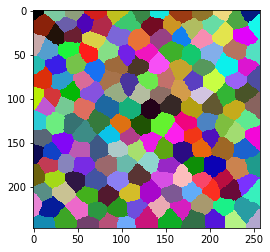

In [2]:
# Generate artificial cells as test data
tissue = cle.artificial_tissue_2d()

cle.imshow(tissue, labels=True)

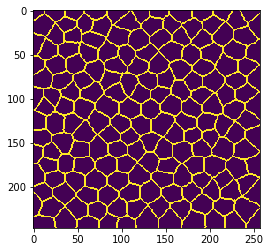

In [3]:
membranes = cle.detect_label_edges(tissue)
cle.imshow(membranes)

# Analysis and visualization of neighbor count

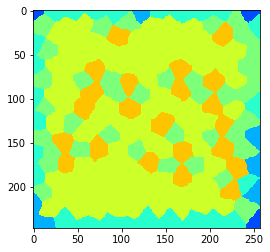

In [4]:
touch_matrix = cle.generate_touch_matrix(tissue)
neighbor_count = cle.count_touching_neighbors(touch_matrix)

parametric_image = cle.replace_intensities(tissue, neighbor_count)
cle.imshow(parametric_image, min_display_intensity=0, max_display_intensity=10, color_map='jet')


## Average the measurement between cells to reduce noise
Mean of touching neighbors

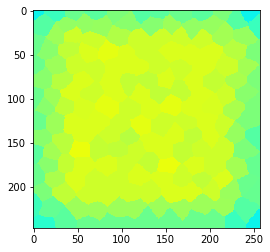

In [5]:
local_mean_neighbor_count = cle.mean_of_touching_neighbors(neighbor_count, touch_matrix)

parametric_image = cle.replace_intensities(tissue, local_mean_neighbor_count)
cle.imshow(parametric_image, min_display_intensity=0, max_display_intensity=10, color_map='jet')

Median of touching neighbors

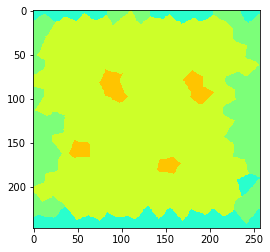

In [6]:
local_median_neighbor_count = cle.median_of_touching_neighbors(neighbor_count, touch_matrix)

parametric_image = cle.replace_intensities(tissue, local_median_neighbor_count)
cle.imshow(parametric_image, min_display_intensity=0, max_display_intensity=10, color_map='jet')

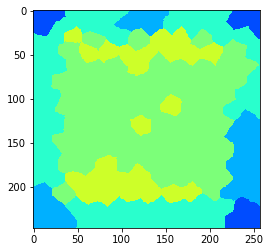

In [7]:
local_minimum_neighbor_count = cle.minimum_of_touching_neighbors(neighbor_count, touch_matrix)

parametric_image = cle.replace_intensities(tissue, local_minimum_neighbor_count)
cle.imshow(parametric_image, min_display_intensity=0, max_display_intensity=10, color_map='jet')

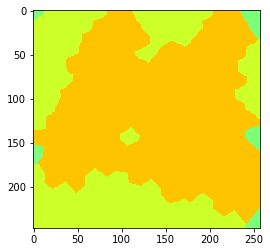

In [8]:
local_maximum_neighbor_count = cle.maximum_of_touching_neighbors(neighbor_count, touch_matrix)

parametric_image = cle.replace_intensities(tissue, local_maximum_neighbor_count)
cle.imshow(parametric_image, min_display_intensity=0, max_display_intensity=10, color_map='jet')

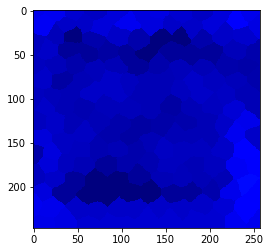

In [9]:
local_standard_deviation_neighbor_count = cle.standard_deviation_of_touching_neighbors(neighbor_count, touch_matrix)

parametric_image = cle.replace_intensities(tissue, local_standard_deviation_neighbor_count)
cle.imshow(parametric_image, min_display_intensity=0, max_display_intensity=10, color_map='jet')

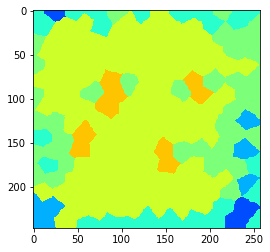

In [10]:
# most popular number of neighbors locally
local_mode_neighbor_count = cle.mode_of_touching_neighbors(neighbor_count, touch_matrix)

parametric_image = cle.replace_intensities(tissue, local_mode_neighbor_count)
cle.imshow(parametric_image, min_display_intensity=0, max_display_intensity=10, color_map='jet')